<img style="float:left" width="70%" src="escudo_COLOR_1L_DCHA.png">
<img style="float:right" width="15%" src="PythonLogo.svg">
<br style="clear:both;">


# **Juego Linja**
### *Sistemas Inteligentes* (Curso 2023-2024)


***Alumna:** Jimena Arnaiz González*

**NOTA:** En algún método hay prints interesantes como el de "fila ocupada" del método obtenerMov() o "turno perdido" de extraPerdida() comentados para que no se repitan a la hora de usar el minimax (jugada del jugador2).
Hice eso porque no encontré una forma de hacer que no se me repitieran. También, respecto a este tema, hay dos métodos que están repetidos (un método con prints y otro sin prints) para evitar esa repetición. En esos dos, repito el código en vez de comentar los print directamente porque tienen varios prints que podrían servir de ayuda a la hora de realizar el movimiento en el jugador1. 

**Clase TableroLinja** 

In [1]:
from copy import deepcopy
from typing import Tuple, List
import math

#librerías para mostrar el tablero con imgs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [2]:
class TableroLinja:
    '''
    Constructor de la clase TableroLinja.

    @param matrix: Matriz que representa el estado inicial del tablero.
    ''' 
    def __init__(self, matrix):
        self.setMatrix(matrix)
        self.fil = len(matrix)
        self.col = len(matrix[0])
        self.turno = 1 #turno actual
        self.contMovs = 2
        self.turnoExtra = False
        self.filas2Mov = 0 #filas que puedes saltar en el movimiento 2
    
    '''
    Comprueba si dos instancias de TableroLinja son iguales.

    @param other: Otra instancia de TableroLinja para comparar.
    @return: True si las instancias son iguales, False en caso contrario.
    '''
    def __eq__(self, other) -> bool:
        for i in range(self.fil):
            for j in range(self.col):
                if self.matrix[i][j] != other.matrix[i][j]:
                    return False
        return True
    
    '''
    Establece la matriz del objeto actual con una copia profunda de la matriz proporcionada.

    @param matrix: Nueva matriz para asignar al tablero.
    '''
    def setMatrix(self, matrix):
        self.matrix = deepcopy(matrix)
    
    '''
    Devuelve una copia profunda de la matriz almacenada en el objeto actual.

    @return: Copia profunda de la matriz.
    '''
    def getMatrix(self) -> List[List]:
        return deepcopy(self.matrix)
    
    '''
    Copia los atributos del tablero pasado por parámetro en el tablero actual.
    La utilizo para realizar en el minimax la copia de los estados hijos.

    @param other: Otra instancia de TableroLinja para copiar sus atributos.
    '''
    def copyFrom(self, other):
        # Copy the state of another TableroLinja object to this object.
        self.fil = other.fil
        self.col = other.col
        self.turno = other.turno
        self.contMovs = other.contMovs
        self.turnoExtra = other.turnoExtra
        self.filas2Mov = other.filas2Mov
        
    '''
    Imprime el tablero con letras.

    @return: Representación en cadena del tablero.
    '''
    def imprimirTablero(self):
        result = ""
        result += '\n'
        for i in range(len(self.matrix)):
            for j in range(len(self.matrix[0])):
                result += str(self.matrix[i][j]) + ' '
            result += '\n'
        return result #hago que retorne el resultado pq de otra forma imprimía None siempre
    
    '''
    Impresión del tablero con imágenes.
    Utiliza un diccionario que mapea valores en el tablero a nombres de archivos de imagen.
    
    @return: No debería de retornar nada, pero al llamarlo, me muestra None 
    '''
    def imprimirTabConImagenes(self):
        #Diccionario que mapea valores en el tablero a nombres de archivos de imagen
        imagen_dict = {'R': 'rojaBienBorde.jpg', 'V': 'vacioBienBorde.jpg', 'N': 'negraBienBorde.jpg'}
        
        # Crea una figura y ejes
        fig, ax = plt.subplots()

        matriz = np.array(self.getMatrix())

        #Configura el tamaño de la figura para que coincida con el tamaño de la matriz
        fig.set_size_inches(np.array(matriz.shape[::-1]) / 2)

        #Itera sobre la matriz y mostrar imágenes según los valores en el tablero
        for i in range(matriz.shape[0]):
            for j in range(matriz.shape[1]):
                if matriz[i, j] in imagen_dict:
                    imagen = mpimg.imread(imagen_dict[matriz[i, j]])
                    ax.imshow(imagen, extent=(j, j + 1, matriz.shape[0] - i - 1, matriz.shape[0] - i))

        #Dibuja líneas para separar las celdas en el borde derecho e inferior
        for i in range(matriz.shape[0]):
            ax.add_line(plt.Line2D([matriz.shape[1], matriz.shape[1]], [i, i + 1], color='black'))
        for j in range(matriz.shape[1]):
            ax.add_line(plt.Line2D([j, j + 1], [matriz.shape[0], matriz.shape[0]], color='black'))
            
        # Dibuja líneas para separar las celdas en el borde derecho e inferior
        for i in range(matriz.shape[0]):
            ax.add_line(plt.Line2D([matriz.shape[1], matriz.shape[1]], [i, i + 1], color='black'))
            ax.add_line(plt.Line2D([0, matriz.shape[1]], [i + 1, i + 1], color='black'))

        for j in range(matriz.shape[1]):
            ax.add_line(plt.Line2D([j, j + 1], [matriz.shape[0], matriz.shape[0]], color='black'))
            ax.add_line(plt.Line2D([j, j], [0, matriz.shape[0]], color='black'))
        
         # Dibuja líneas para los bordes exteriores
        ax.add_line(plt.Line2D([0, matriz.shape[1]], [0, 0], color='black'))
        ax.add_line(plt.Line2D([matriz.shape[1], matriz.shape[1]], [0, matriz.shape[0]], color='black'))
        ax.add_line(plt.Line2D([0, 0], [0, matriz.shape[0]], color='black'))
        ax.add_line(plt.Line2D([0, matriz.shape[1]], [matriz.shape[0], matriz.shape[0]], color='black'))

        #Configura ejes y muestra la figura
        ax.set_xlim(0, matriz.shape[1])
        ax.set_ylim(0, matriz.shape[0])
        ax.set_aspect('equal', 'box')
        ax.axis('off')
        
        plt.show()

                
    '''
    Dada una fila y columna, coloca la pieza (tile) en dicha posición.

    @param fila: Fila de la posición.
    @param col: Columna de la posición.
    @param tile: Valor a colocar en la posición.
    '''
    def placeTile(self, fila: int, col: int, tile: int):
        if 0 <= fila < self.fil and 0 <= col < self.col:
            self.matrix[fila][col] = tile
    
    '''
    Elimina el elemento de la posición especificada.

    @param fila: Fila de la posición a eliminar.
    @param col: Columna de la posición a eliminar.
    '''
    def deleteTile(self, fila: int, col: int):
        if (0 <= fila < self.fil) and (0 <= col < self.col): 
            self.matrix[fila][col] = 'V'
    
    '''
    Devuelve la celda correspondiente a la fila y columna pasadas por parámetro.

    @param fila: Fila de la celda.
    @param col: Columna de la celda.
    @return: Valor de la celda.
    '''
    def getCelda(self, fila: int, col: int):
        return self.matrix[fila][col]
    
    '''
    Devuelve las filas a las que puedes ir (no completas).

    @return: Lista de filas accesibles.
    '''
    def isAvailable(self) -> list:
        filasAccesibles = []
        
        filasAccesibles.append(self.matrix[0]) #Agregar la fila 0 (pq puede haber un nº indef de fichas en los extremos)

        for i in range(self.fil):
            for j in range(self.col):
                if 'V' in self.matrix[i]:  # Si encuentra al menos una 'V' en la fila, agrega la fila
                    filasAccesibles.append(self.matrix[i])
                    break
        filasAccesibles.append(self.matrix[7]) #Agregar la fila 7 (extremo del j1)

        return filasAccesibles
    
    '''
    Función de coste minimax (una función para fichas rojas y otra para negras).

    @param jugador: Jugador para el cual se calcula el coste (1 para fichas rojas, 2 para fichas negras).
    @return: Valor del coste minimax.
    '''
    def utility(self, jugador: int) -> int:
        puntosR = 0
        puntosN = 0
        puntos_valores = [5, 3, 2, 1, -1, -2, -3, -5]

        for i in range(len(self.matrix)):
            for j in range(self.col):
                if self.matrix[i][j] == 'R':
                    puntosR += puntos_valores[i]
                elif self.matrix[i][j] == 'N':
                    puntosN -= puntos_valores[i]
        if jugador == 1:
            return puntosR - puntosN
        else:
            return puntosN - puntosR
    
    '''
    Halla los puntos del jugador pasado por parámetro.

    @param jugador: Jugador para el cual se calcula el puntaje (1 para fichas rojas, 2 para fichas negras).
    @return: Puntaje del jugador.
    '''
    def puntuaje(self, jugador: int) -> int:
        puntosR = 0
        puntosN = 0
        puntos_valores = [5, 3, 2, 1, -1, -2, -3, -5]

        for i in range(len(self.matrix)):
            for j in range(self.col):
                if self.matrix[i][j] == 'R':
                    puntosR += puntos_valores[i]
                elif self.matrix[i][j] == 'N':
                    puntosN -= puntos_valores[i]
        if jugador == 1:
            return puntosR
        return puntosN
    
    '''
    Valida si la fila pasada por parámetro está dentro de los límites del tablero.

    @param row: Fila a validar.
    @return: True si la fila es válida, False en caso contrario.
    '''
    def filaValida(self, row: int):
        if row < self.fil and row >= 0:
            return True
        return print("\n\033[1;91mFila fuera de los límites del tablero\033[0m")
    
    '''
    Valida si la columna pasada por parámetro está dentro de los límites del tablero.

    @param col: Columna a validar.
    @return: True si la columna es válida, False en caso contrario.
    '''
    def colValida(self, col: int):
        if col < self.col and col >= 0:
            return True
        return print("\n\033[1;91mColumna fuera de los límites del tablero\033[0m")
    
    '''
    Retorna True si la fila pasada por parámetro está vacía (todos los elementos son 'V').

    @param row: Fila a verificar.
    @return: True si la fila está vacía, False en caso contrario.
    '''
    def filaVacia(self, row: int) -> bool:
        for j in range(len(self.matrix[row])):
            if self.matrix[row][j] != 'V':
                return False
        return True
    
    '''
    Dada una fila, devuelve una lista con las columnas que contienen elementos 'V' (celdas vacías).

    @param row: Fila a analizar.
    @return: Lista de columnas con celdas vacías.
    '''
    def celdasVacias(self, row):  
        celdas = []
        for j in range(len(self.matrix[row])): #todas las vacías de una fila
            if self.matrix[row][j] == 'V':
                celdas.append(j)
        return celdas
             
    '''
    Devuelve en qué movimiento se encuentra el jugador (1 para el primer movimiento, 2 para el segundo movimiento).

    @return: Número del movimiento actual.
    '''
    def queMovEs(self):
        if self.contMovs == 2: # si me quedan 2 movs, estoy en mi 1er mov
            return 1
        else:
            return 2

    '''
    Valida si se puede realizar el movimiento especificado.

    @param fila: Fila de origen del movimiento.
    @param col: Columna de origen del movimiento.
    @param nCol: Nueva columna de destino del movimiento.
    @return: True si el movimiento es válido, False en caso contrario.
    '''
    def validarMov (self, fila: int, col: int, nCol: int):
        celda = self.getCelda(fila,col)
        valid = True  

        if not self.filaValida(fila) or not self.colValida(col):
            ##print("La posición está fuera de los límites del tablero")
            valid = False
        if self.turno == 1 and celda != 'R':
            ##print(f"El jugador {self.turno} debe jugar con fichas rojas")
            valid = False

        elif self.turno == 2 and celda != 'N':
            ##print(f"El jugador {self.turno} debe jugar con fichas negras")
            valid = False

        return valid
    
    
    #valida si se puede hacer el movimiento 
    #igual que la anterior, pero con prints
    def validarMovConPrints (self, fila: int, col: int, nCol: int):
        celda = self.getCelda(fila,col)
        valid = True  

        if not self.filaValida(fila) or not self.colValida(col):
            print("\033[1;91mLa posición está fuera de los límites del tablero\033[0m")
            valid = False
        if self.turno == 1 and celda != 'R':
            print(f"\033[1;91mEl jugador {self.turno} debe jugar con fichas rojas\033[0m")
            valid = False

        elif self.turno == 2 and celda != 'N':
            print(f"\033[1;91mEl jugador {self.turno} debe jugar con fichas negras\033[0m")
            valid = False

        return valid
    
    '''
    Método auxiliar creado para saber en minimax si el movimiento se puede realizar.

    @param row: Fila de origen del movimiento.
    @param col: Columna de origen del movimiento.
    @param nCol: Nueva columna de destino del movimiento.
    @return: True si el movimiento es posible, False en caso contrario.
    '''
    def puedoHacerMov(self, row: int, col: int, nCol: int) :
        ficha = self.getCelda(row, col)
        if self.turno == 1: #la ficha es dif para cada jugador
            ficha = 'R'
        else:
            ficha = 'N'
            
        if self.contMovs == 2: # si me quedan 2 movs, estoy en mi 1er mov
            numMov = 1
        else:
            numMov = 2
            
        #obtengo la jugada 
        jugada = self.obtenerMov(row, col, self.turno, numMov)
        
        if len(jugada) != 2:
            ##print("No se encontró una jugada válida para el movimiento inicial.")
            return False
        #pos final ficha
        nRow = jugada[1][0]

        #jugada
        if self.getCelda(nRow, nCol) == 'V': # si está libre se hace el mov
            return True
        else:
            ##print("La celda no está libre")
            return False
        
        return 
    
    
    '''mismo método que el anterior, pero con prints para que le salgan al jugador físico
       ya que en el minimax si dejo los prints, me salen muchas veces por las iteraciones
    '''
    def puedoHacerMovConPrints(self, row: int, col: int, nCol: int) :
        ficha = self.getCelda(row, col)
        if self.turno == 1: #la ficha es dif para cada jugador
            ficha = 'R'
        else:
            ficha = 'N'
            
        if self.contMovs == 2: # si me quedan 2 movs, estoy en mi 1er mov
            numMov = 1
        else:
            numMov = 2
            
        #obtengo la jugada 
        jugada = self.obtenerMov(row, col, self.turno, numMov)
        
        if len(jugada) != 2:
            print("\033[1;91mNo se encontró una jugada válida para el movimiento.\033[0m")
            return False
        #pos final ficha
        nRow = jugada[1][0]

        #jugada
        if self.getCelda(nRow, nCol) == 'V': # si está libre se hace el mov
            return True
        else:
            print("\033[1;91mLa celda de destino no está libre\033[0m")
            return False
        
        return 
           
        
    '''
    Prevé cuál es el primer movimiento que me da un segundo movimiento con un mayor número de casillas.
    Método que me devuelve un número entero correspondiente a dicho número.

    @param row: Fila sobre la que quiero saber las celdas ocupadas.
    @return: Número correspondiente al número de casillas ocupadas de dicha fila.
    '''
    def numMovs(self, row: int) -> int:
        cont = 0  
        if 0 <= row < len(self.matrix):
            for j in range(len(self.matrix[row])):
                if 0 <= j < len(self.matrix[row]): #Asegura los límites del índice de la columna
                    if self.matrix[row][j] != 'V':
                        cont += 1
        return cont
        
    '''
    Indica la posición de la ficha que se mueve y hacia dónde se mueve (fila de destino).

    @param row: Fila de origen.
    @param col: Columna de origen.
    @param playerID: Jugador.
    @param numMov: Número de movimiento actual.
    @return: Lista que indica la posición de la ficha que se mueve y hacia dónde se mueve.
    '''
    def obtenerMov(self, row: int, col: int, playerID: int, numMov:int) -> List[List]:
        mov = []
              
        if numMov == 1: #si está en el 1er mov
            if playerID == 1: #R
                newRow = row - 1 #avanza una fila arriba
            else: #N
                newRow = row + 1 #avanza una fila abajo
            self.filas2Mov = self.numMovs(newRow)
            
            if newRow == 7 or newRow == 0:
                self.filas2Mov = 1
        
        if numMov == 2:
            if playerID == 1: #R
                newRow = row - self.filas2Mov
            else:
                newRow = row + self.filas2Mov
                
        #control de extremos        
        if newRow > 7:
            newRow = 7
        elif newRow < 0:
            newRow = 0 
            
        if self.matrix[newRow] in self.isAvailable(): #compruebo si la fila no está ocupada
                mov.append([row, col])
                mov.append([newRow])
        ##else:
            ##print("La fila está ocupada") si no comento el print, se me repite por el minimax
        return mov 
    
    
    #Cambia el turno
    def cambiarTurno(self):
        if self.turno == 1:
            self.turno = 2
        else:
            self.turno = 1
      
    '''
    Mueve una ficha (realiza un movimiento)

    @param row: Fila de origen.
    @param col: Columna de origen.
    @param nCol: Columna de destino.
    @return: 
    '''
    def moverFicha(self, row: int, col: int, nCol: int):
        ficha = self.getCelda(row, col)
        if self.turno == 1: #la ficha es diferente para cada jugador
            ficha = 'R'
        else:
            ficha = 'N'
            
        if self.contMovs == 2: # si me quedan 2 movs, estoy en mi 1er mov
            numMov = 1
        else:
            numMov = 2
        
        #Obtengo la jugada 
        jugada = self.obtenerMov(row, col, self.turno, numMov)
        #Pos final ficha
        nRow = jugada[1][0]
        
        #Jugada
        self.deleteTile(row, col)
        self.contMovs -= 1
        self.extraPerdida(nRow)
        self.placeTile(nRow, nCol, ficha)
            
        #Cambio de turno   
        if self.contMovs == 0:
            self.contMovs = 2
            if self.turnoExtra == False:
                self.cambiarTurno()
        return 0
     
    '''
    Gestiona el turno extra y la pérdida de turno.

    @param nRow: Fila de destino.
    '''   
    def extraPerdida(self, nRow):
        #1er mov pierde turno
        if self.contMovs == 1 and self.filaVacia(nRow):
                self.contMovs = 0
                self.turnoExtra = False
                ##print("¡Fila de destino vacía! Pierdes el turno.") ##la comenté por el minimax
                
        #turno extra en 2o mov
        else: #añadí el else pq si no, tb me iba a este if de abajo
            if self.contMovs == 0 and self.filaVacia(nRow):
                if not self.turnoExtra:
                    self.turnoExtra = True
                    self.contMovs = 2
                else:
                    # El jugador ya tuvo un turno extra y no puede obtener otro consecutivo.
                    self.turnoExtra = False

            elif self.contMovs == 0 and self.turnoExtra == True:
                self.turnoExtra = False
        return 
        
        
    '''
    Determina si se ha acabado la partida y qué jugador es el ganador.

    @return: 1 si el jugador 1 gana, 2 si el jugador 2 gana, 0 en caso de empate, -1 si la partida no ha terminado.
    '''
    def endGame(self) -> int:
        # Verificar si las fichas de ambos jugadores están separadas
        fichas_separadas = True
        filasR = [] #almacena los índices de las filas que contienen fichas rojas
        filasN = [] #almacena los índices de las filas que contienen fichas negras
        
        #recorro las filas y añado el num de la fila en la lista correspondiente dependiendo de si hay fichas R o N
        for i in range(self.fil):
            if 'R' in self.matrix[i]:
                filasR.append(i)
            if 'N' in self.matrix[i]:
                filasN.append(i)
        
        #Comprueba si la fila i está ocupada por fichas 'N'
        for i in range(filasR[0], filasR[-1] + 1): 
            if i in filasN:
                fichas_separadas = False
                break
                    
        #compruebo que las filas ocupadas por las fichas 'N' estén separadas de las filas ocupadas por las fichas 'R'
        if fichas_separadas and filasN and filasR:
            if filasN[-1] < filasR[0] or filasR[-1] < filasN[0]:
                fichas_separadas = True
            else:
                fichas_separadas = False
        
        #si las fichas están separadas, calculo la puntuación
        if fichas_separadas:
            puntosR = self.puntuaje(jugador=1)
            puntosN = self.puntuaje(jugador=2)
            print("Puntuación del jugador 1:", puntosR)
            print("Puntuación del jugador 2:", puntosN)

            if puntosR > puntosN:
                print("El jugador 1 gana.")
                return 1
            elif puntosR < puntosN:
                print("El jugador 2 gana.")
                return 2
            else:
                print("La partida termina en empate.")
                return 0
        else:
            return -1  # Indica que la partida no ha terminado


**Función asociada al método *Minimax* (con poda $\alpha-\beta$)**

In [3]:
def miniMax(state:TableroLinja, currentLevel:int, maxLevel:int, player:int, alpha:int, beta:int, stop:bool) -> Tuple[TableroLinja, int, bool]:
    # Defino los sucesores(hijos)
    successorMatrices = [] #lista que almecenará los hijos (1 turno)
    primerMov = [] #almacenará hijos con el 1er mov hecho
    
    if currentLevel == maxLevel:
        return (state , state.utility(player), stop)  
    
    utility = state.utility(player) #LLamo a la función de utilidad
    
    #Actualizo el conjunto de las matrices de sucesores, coger los 5 primeros hijos q nos dé (un hijo = 2mov), o sea un turno
    #padre = TableroLinja(state.getMatrix())
    maxHijos = 4 #0-4 -> 5 hijos
    for current_row in range(8):
        for current_col in range(6):
            child_state = TableroLinja(matrix = state.getMatrix())  # matriz padre turno siempre es 1 pq crea nueva inst
            child_state.copyFrom(state) ##lo añado para que sea igual a state

            if len(primerMov) == maxHijos:
                break

            jugada = child_state.obtenerMov(current_row, current_col, child_state.turno, child_state.queMovEs())
            
            if len(jugada) != 2: #si no hay una jugada posible (bien porque la fila destino está llena u otro motivo)
                continue #salgo del bucle interior y continuo con el siguiente valor de current_row

            nRow = jugada[1][0] #fila destino
            newCol = child_state.celdasVacias(nRow) #lista con las col de las celdas vacías de nRow

            if child_state.turno == player and newCol and child_state.validarMov(current_row, current_col, newCol[0]) and child_state.puedoHacerMov(
                    current_row, current_col, newCol[0]): #solo se hace el mov si es válido
                child_state.moverFicha(current_row, current_col, newCol[0])
                primerMov.append(child_state)
                
    #genero hijos con los 2 mov
    cont = 0
    i = 0
    for i in range(len(primerMov)): #recorro los estados del 1er mov #
        for current_row in range(8):
            for current_col in range(6):
                
                current_state = TableroLinja(primerMov[i].getMatrix())
                current_state.copyFrom(primerMov[i])
                
                jugada = current_state.obtenerMov(current_row, current_col, current_state.turno, current_state.queMovEs())
                
                if len(jugada) != 2: #comprobamos que la fila no está ocupada
                    continue #si lo está miramos en la siguiente current_col
                    
                nRow = jugada[1][0]
                newCol = current_state.celdasVacias(nRow)
     
                if newCol and current_state.validarMov(current_row, current_col, newCol[0]) and current_state.puedoHacerMov(
                            current_row, current_col, newCol[0]):  # Verificar si el movimiento es válido

                    current_state.moverFicha(current_row, current_col, newCol[0])  # Realizar el segundo movimiento
                    successorMatrices.append(current_state) # Agregar el sucesor a la lista
                    cont+=1
                    if cont == 4: #si ya hay 4 elmentos en successorMatrices, paramos de coger hijos
                        break

            if cont == 4: ##comprobar si son 4 o 5 hijos
                break
        if cont == 4:
            break
                   
    if len(successorMatrices) == 0:
        stopDigging = True
        coste=state.utility(player)
        return (state,coste,stopDigging)
       
    bestMatrix = None
    
    #si el jugador es la IA       
    if player == 2:                    
        maxValue = -math.inf #alpha (la mayor utilidad)
        
        for i in range(0, len(successorMatrices)):            
            mat = TableroLinja(successorMatrices[i].getMatrix()) 
            mat.copyFrom(successorMatrices[i]) 
                
            matrizS, utility, stop = miniMax(mat, currentLevel + 1, maxLevel, 1, alpha,beta,stop)
            
            best = utility #la mejor utilidad será la utilidad de la matriz del sucesor i 
            
            if best > maxValue: #si la utilidad actual es mayor a la definida
                maxValue = best
                bestMatrix = TableroLinja(successorMatrices[i].getMatrix())  # la mejor matriz será la del sucesor i
                bestMatrix.copyFrom(successorMatrices[i])  # copiar otros atributos necesarios
                    
            alpha = max(alpha, best)                
            if best >= beta:
                return (matrizS,best,stop)
                
    #si el jugador es el físico             
    else:                           
        minValue = math.inf #beta
        
        for i in range(0, len(successorMatrices)):
            mat = TableroLinja(successorMatrices[i].getMatrix()) 
            mat.copyFrom(successorMatrices[i]) 
            matrizS, utility, stop = miniMax(mat, currentLevel + 1, maxLevel, 2, alpha,beta,stop)
                
            if utility < minValue:
                minValue = utility
                bestMatrix = TableroLinja(successorMatrices[i].getMatrix())  # mejor matriz será la del sucesor i
                bestMatrix.copyFrom(successorMatrices[i])  # copiar otros atributos necesarios
                
            beta = min(beta, utility)
            if utility <= alpha:                    
                return (matrizS,utility,stop)
                  
    return (bestMatrix, maxValue if player == 2 else minValue, stop) #si el jugador es la IA se devuelve el valor máx      
   

**Poner en funcionamiento Minimax**

In [4]:
def performActionMinMax(state:TableroLinja, player:int):
    
    tmp = TableroLinja(state.getMatrix())
    tmp.copyFrom(state)
    
    depth = 2 #profundidad del árbol de los hijos creados
    stop = False 
    currentLevel = 0
    itera = 0  
    
    while not stop and itera <= depth:          
        tmpMatrizB = TableroLinja(tmp.getMatrix())
        tmpMatrizB.copyFrom(tmp) #para mantener los atributos
        (matrizoptima, valoroptimo, stop) = miniMax(tmpMatrizB, currentLevel, depth, player , -math.inf, math.inf,stop);        
        itera+=1      
        
    return matrizoptima

**Realización del movimiento por parte del jugador - ordenador**


In [5]:
def AIAction(state:TableroLinja, player:int):
    
    global AIReadyToMove
   
    matriz = TableroLinja(state.getMatrix())
    matriz.copyFrom(state)

    movIa = performActionMinMax(matriz, player) #movimiento d la IA
    
    AIReadyToMove = False
   
    return movIa

In [6]:
matrizInicio=[['N','N','N','N','N','N'],
              ['N','V','V','V','V','R'],
              ['N','V','V','V','V','R'],
              ['N','V','V','V','V','R'],
              ['N','V','V','V','V','R'],
              ['N','V','V','V','V','R'],
              ['N','V','V','V','V','R'],
              ['R','R','R','R','R','R']]



Bienvenido al juego Linja, disfrute de la partida.

Jugador 1 (R):______
Jugador 2 (N): IA



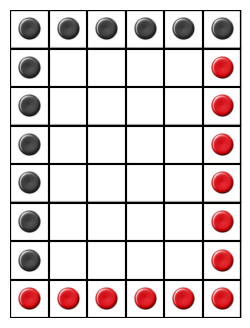

None
--------------------------------------
Turno extra: False
ContMovs: 2
--------------------------------------



In [ ]:
salgo = False
movimiento = 'NULL'
print("Bienvenido al juego Linja, disfrute de la partida.\n")
print("\033[91mJugador 1 (R):\033[0m______\nJugador 2 (N): IA\n")

tab = TableroLinja(matrizInicio)
print(tab.imprimirTabConImagenes())

while not salgo:
    #print(tab.imprimirTabConImagenes())
    print("--------------------------------------")
    print(f"Turno extra: {tab.turnoExtra}")
    print(f"ContMovs: {tab.contMovs}")
    print("--------------------------------------")

    if tab.turno == 1: # Verifica si es el turno del jugador humano (jugador 1)
        print() #me aseguro de que el input salga después de los anteriores print
        try:
            movimiento = input(f"\033[91mjugador {tab.turno}:\033[0m Introduce tu jugada (row, col, nCol): ")
            fila, col, nCol = map(int, movimiento.split())

            if tab.filaValida(fila) and tab.colValida(col) and tab.colValida(nCol) and tab.validarMovConPrints(fila, col, nCol) and tab.puedoHacerMovConPrints(fila, col, nCol) :
                tab.moverFicha(fila, col, nCol)
                print()
                print(tab.imprimirTabConImagenes())
                print()
        except ValueError:
            print()
            print("\033[1;91m******************************************************************\033[0m")
            print("\033[1;91mPor favor, introduce bien los datos separados por espacios.\033[0m")
            print("\033[1;91m******************************************************************\033[0m")
            print(tab.imprimirTabConImagenes())
    else:
        # Actualiza directamente la matriz con el movimiento de la IA
        print()
        print("Jugador 2:")
        movIa = AIAction(tab,2)
        tab.setMatrix(movIa.getMatrix())
        tab.copyFrom(movIa)
        print(tab.imprimirTabConImagenes())

    if tab.endGame() != -1:
        salgo = True
